In [32]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
train_X = np.load("data/A/train_data.npy")
train_y = np.load("data/A/train_label.npy")
test_X = np.load("data/A/test_data.npy")
test_y = np.load("data/A/test_label.npy")

In [3]:
train_X.shape

(100000, 30, 120, 3)

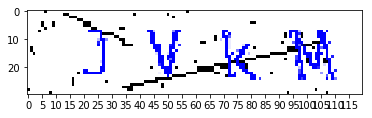

In [4]:
plt.xticks(np.arange(0,120,5))
plt.imshow(train_X[0])

切片

15:40

40:65

65:90

90:115

In [5]:
train_X = 255 - np.concatenate((train_X[:,:,15:40,:], train_X[:,:,40:65,:], train_X[:,:,65:90,:], train_X[:,:,90:115,:]))
test_X = 255 - np.concatenate((test_X[:,:,15:40,:], test_X[:,:,40:65,:], test_X[:,:,65:90,:], test_X[:,:,90:115,:]))

In [6]:
train_y = train_y.view("U1").reshape(-1,4).T.ravel()
test_y = test_y.view("U1").reshape(-1,4).T.ravel()

k


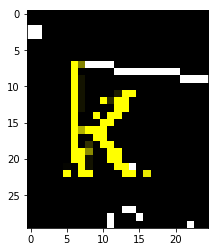

In [18]:
i = 157
plt.imshow(train_X[i])
print(train_y[i])

k


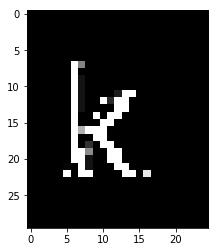

In [17]:
i = 157
plt.imshow(train_X[i,:,:,1] - train_X[i,:,:,2], cmap=plt.cm.gray)
print(train_y[i])

k


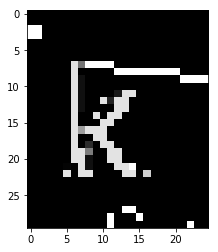

In [45]:
i = 157
plt.imshow(0.3 * train_X[i,:,:,0] + 0.59 * train_X[i,:,:,1] + 0.11 * train_X[i,:,:,2], cmap=plt.cm.gray)
print(train_y[i])

# 去除噪点

In [40]:
train_X_s, train_y_s = resample(
    train_X, train_y, replace=False, n_samples=10000, random_state=0
)

test_X_s, test_y_s = resample(
    test_X, test_y, replace=False, n_samples=1000, random_state=0
)

In [43]:
train_1ds_X = (train_X_s[:,:,:,1] - train_X_s[:,:,:,2]).reshape(train_X_s.shape[0], -1)
test_1ds_X = (test_X_s[:,:,:,1] - test_X_s[:,:,:,2]).reshape(test_X_s.shape[0], -1)

In [44]:
model = SVC(kernel='poly',degree=3)
model.fit(train_1ds_X, train_y_s)
pred_y = model.predict(test_1ds_X)
print(classification_report(test_y_s, pred_y))

             precision    recall  f1-score   support

          3       1.00      1.00      1.00        17
          4       1.00      1.00      1.00        21
          5       1.00      1.00      1.00        26
          6       1.00      1.00      1.00        20
          7       1.00      1.00      1.00        18
          8       1.00      1.00      1.00        16
          9       1.00      1.00      1.00        19
          A       1.00      1.00      1.00        23
          B       1.00      1.00      1.00        20
          C       1.00      1.00      1.00        26
          D       1.00      1.00      1.00        24
          E       1.00      1.00      1.00        26
          F       1.00      1.00      1.00        23
          G       1.00      1.00      1.00        16
          H       1.00      1.00      1.00        24
          J       1.00      1.00      1.00        25
          K       1.00      1.00      1.00        27
          M       1.00      1.00      1.00   

# 不去除噪点

In [49]:
train_1ds_X = (0.3 * train_X_s[:,:,:,0] + 0.59 * train_X_s[:,:,:,1] + 0.11 * train_X_s[:,:,:,2]).reshape(train_X_s.shape[0], -1)
test_1ds_X = (0.3 * test_X_s[:,:,:,0] + 0.59 * test_X_s[:,:,:,1] + 0.11 * test_X_s[:,:,:,2]).reshape(test_X_s.shape[0], -1)

In [50]:
model = SVC(kernel='poly',degree=3)
model.fit(train_1ds_X, train_y_s)
pred_y = model.predict(test_1ds_X)
print(classification_report(test_y_s, pred_y))

             precision    recall  f1-score   support

          3       1.00      1.00      1.00        17
          4       1.00      1.00      1.00        21
          5       0.93      1.00      0.96        26
          6       0.95      1.00      0.98        20
          7       1.00      1.00      1.00        18
          8       1.00      1.00      1.00        16
          9       1.00      1.00      1.00        19
          A       1.00      0.96      0.98        23
          B       1.00      1.00      1.00        20
          C       1.00      0.96      0.98        26
          D       1.00      1.00      1.00        24
          E       0.90      1.00      0.95        26
          F       0.95      0.87      0.91        23
          G       1.00      1.00      1.00        16
          H       1.00      1.00      1.00        24
          J       1.00      1.00      1.00        25
          K       1.00      1.00      1.00        27
          M       1.00      1.00      1.00   